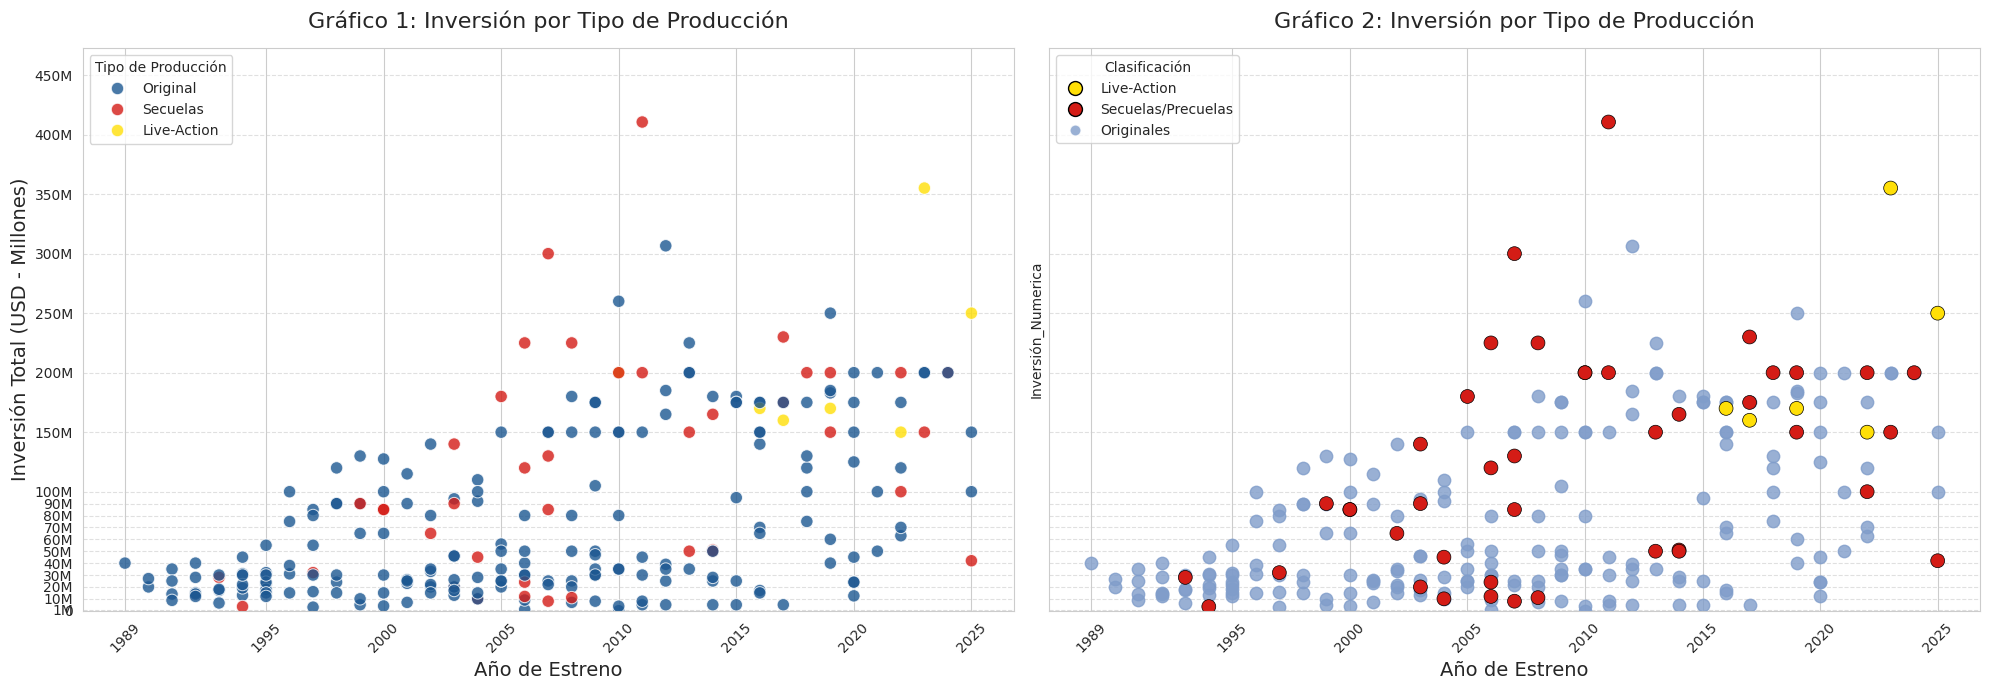

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter, FixedLocator


file_name = 'inversión_visualización DISNEY.csv'
try:
    df = pd.read_csv(file_name, sep=';', encoding='latin-1')
except FileNotFoundError:
    #
    file_name = '/content/inversión_visualización DISNEY.csv'
    df = pd.read_csv(file_name, sep=';', encoding='latin-1')

df.columns = df.columns.str.strip().str.replace('\r', '', regex=False)
TITULO_COL_NAME = df.columns[0]
INVERSION_COL_NAME = df.columns[3]
FECHA_COL_NAME = df.columns[2]


df['Inversión_Numerica'] = pd.to_numeric(df[INVERSION_COL_NAME].astype(str).str.strip().str.replace('"', '', regex=False).str.replace('.', '', regex=False).str.replace(',', '', regex=False), errors='coerce')
df['Año_Estreno'] = pd.to_numeric(df[FECHA_COL_NAME].astype(str).str.slice(0, 4), errors='coerce')
df_limpio = df.dropna(subset=['Año_Estreno', 'Inversión_Numerica']).copy()
df_limpio = df_limpio[df_limpio['Inversión_Numerica'] > 0]
df_limpio['Año_Estreno'] = df_limpio['Año_Estreno'].astype(int)
df_limpio['Tipo_Produccion_Detalle'] = 'Original'


alicia_condition = (
    df_limpio[TITULO_COL_NAME].str.lower().str.contains('alicia|alice', na=False) &
    (df_limpio['Año_Estreno'] == 2010)
)
df_limpio.loc[alicia_condition, 'Inversión_Numerica'] = 200000000


freaky_friday_cond = df_limpio[TITULO_COL_NAME].str.lower().str.contains('freaky friday 2', na=False)
df_limpio.loc[freaky_friday_cond, 'Tipo_Produccion_Detalle'] = 'Secuelas'
# ----------------------------------------------------------------------------------


keywords_secuela_precuela = r'2|3|4|5|6|7|II|III|IV|V|VI|VII|retorno|secuela|spin-off|precuela|toystory|frozen|cars|planes|hocus pocus|encantada|narnia|aviones|piratas|lightyear'
keywords_remake_la = r'live-action|remake|sirenita|bella y la bestia|aladdin|dumbo|tarzan|pinocho|mulan|rey león|blanca nieves|alicia|freaky friday'


df_limpio['Tipo_Produccion_Detalle'] = 'Original'


condicion_la_pura = (
    df_limpio[TITULO_COL_NAME].str.lower().str.contains(keywords_remake_la, na=False) &
    (df_limpio['Año_Estreno'] >= 2010) &
    (~df_limpio[TITULO_COL_NAME].str.lower().str.contains(keywords_secuela_precuela, na=False))
)
df_limpio.loc[condicion_la_pura, 'Tipo_Produccion_Detalle'] = 'Live-Action'


condicion_secuela_general = df_limpio[TITULO_COL_NAME].str.lower().str.contains(keywords_secuela_precuela, na=False)
df_limpio.loc[condicion_secuela_general, 'Tipo_Produccion_Detalle'] = 'Secuelas'


df_limpio.loc[freaky_friday_cond, 'Tipo_Produccion_Detalle'] = 'Secuelas'



color_map_g1 = {
    'Secuelas': '#D41C16',      
    'Live-Action': '#ffdf07',   
    'Original': '#1c5791'       
}
COLOR_FONDO_G2 = '#809dca'
CATEGORIAS_A_FONDO = ['Original']
CATEGORIAS_A_RESALTAR = ['Secuelas', 'Live-Action']


def smart_formatter(x, pos):
    if x >= 1000000: return f'{int(round(x/1000000))}M'
    else: return f'{int(x)}'

Y_LIM_MAX = 450000000
Y_LIM_TOP = Y_LIM_MAX * 1.05

Y_TICKS_CUSTOM_BASE = np.array([0, 1]) * 1000000
Y_TICKS_10M_INCREMENTS = np.arange(10000000, 100000001, 10000000)
Y_TICKS_50M_INCREMENTS = np.arange(150000000, Y_LIM_MAX + 1, 50000000)
Y_TICKS_MAIN = np.unique(np.concatenate((Y_TICKS_CUSTOM_BASE, Y_TICKS_10M_INCREMENTS, Y_TICKS_50M_INCREMENTS)))

X_TICKS = [1989, 1995, 2000, 2005, 2010, 2015, 2020, 2025]




sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, figsize=(20, 7),
    sharex=True
)

df_main = df_limpio[df_limpio['Inversión_Numerica'] <= Y_LIM_MAX].copy()


ax1.set_ylim(0, Y_LIM_TOP)
ax1.set_title('Gráfico 1: Inversión por Tipo de Producción', fontsize=16, pad=15)
ax1.set_xlabel('Año de Estreno', fontsize=14); ax1.set_ylabel('Inversión Total (USD - Millones)', fontsize=14)

sns.scatterplot(x='Año_Estreno', y='Inversión_Numerica', hue='Tipo_Produccion_Detalle', data=df_main, palette=color_map_g1, s=80, alpha=0.8, ax=ax1, legend=True)

ax1.set_yticks(Y_TICKS_MAIN); ax1.yaxis.set_major_formatter(FuncFormatter(smart_formatter))
ax1.set_xticks(X_TICKS); ax1.tick_params(axis='x', rotation=45); ax1.grid(axis='y', which='major', linestyle='--', alpha=0.6)

ax1.legend(title='Tipo de Producción', loc='upper left', frameon=True, fontsize=10)


ax2.set_ylim(0, Y_LIM_TOP)
ax2.set_title('Gráfico 2: Inversión por Tipo de Producción', fontsize=16, pad=15)
ax2.set_xlabel('Año de Estreno', fontsize=14); ax2.set_ylabel('')


df_fondo = df_main[df_main['Tipo_Produccion_Detalle'].isin(CATEGORIAS_A_FONDO)]
ax2.scatter(x=df_fondo['Año_Estreno'], y=df_fondo['Inversión_Numerica'], s=80, color=COLOR_FONDO_G2, alpha=0.8)


df_resaltadas = df_main[df_main['Tipo_Produccion_Detalle'].isin(CATEGORIAS_A_RESALTAR)]
sns.scatterplot(x='Año_Estreno', y='Inversión_Numerica', hue='Tipo_Produccion_Detalle', data=df_resaltadas, palette=color_map_g1, s=100, edgecolors='black', linewidths=0.5, alpha=1.0, ax=ax2, legend=False)

ax2.set_yticks(Y_TICKS_MAIN); ax2.yaxis.set_major_formatter(FuncFormatter(smart_formatter))
ax2.set_xticks(X_TICKS); ax2.tick_params(axis='x', rotation=45); ax2.grid(axis='y', which='major', linestyle='--', alpha=0.6)
ax2.tick_params(axis='y', labelleft=False)


legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Live-Action', markerfacecolor=color_map_g1['Live-Action'], markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Secuelas/Precuelas', markerfacecolor=color_map_g1['Secuelas'], markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Originales', markerfacecolor=COLOR_FONDO_G2, markersize=8, alpha=0.8)
]
ax2.legend(handles=legend_elements, loc='upper left', title='Clasificación', frameon=True, fontsize=10)

plt.tight_layout()
plt.show()